# Pre-processing

In [ ]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=b0b5bbfb8f9ac81fbf690ece48ba5526c5b32247eab644cddd937fb2f27be1bf
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [ ]:
!pip install ace_tools

In [ ]:
!pip install transformers

In [ ]:
!pip install tqdm

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is 

In [ ]:
# prompt: load the data_clean.csv file

import pandas as pd

# Load the dataframe.
try:
    df = pd.read_csv('data_clean.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'data_clean.csv' not found. Please upload the file.")
except pd.errors.EmptyDataError:
    print("Error: 'data_clean.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'data_clean.csv'. Please check the file format.")


Data loaded successfully.


In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
import wikipedia

# Configurar Wikipedia para que use el idioma español
wikipedia.set_lang("en")

# Cargar el modelo y el tokenizador para español
#model_name = "dccuchile/bert-base-spanish-wwm-cased"
#model_name = "bert-base-multilingual-cased"
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# Medidas Saliencia

In [ ]:
# Seleccionar las columnas desde "ghana" hasta "oman"
columnas_interes = df.loc[:, "ghana":"oman"]

# Calcular la media de cada columna
media_columnas = columnas_interes.mean().sort_values(ascending=False)

# Mostrar el resultado
print(media_columnas)

eeuu                8.662890
rusia               8.373938
china               8.107649
singapur            8.050992
alemania            7.648725
francia             7.342776
espa√±a             7.150142
marruecos           7.084986
italia              7.053824
belgica             6.169972
japon               6.167139
canada              6.028329
noruega             5.747875
ecuador             5.546742
brasil              5.541076
portugal            5.441926
india               5.419263
mejico              5.325779
argentina           5.192635
uk                  4.988669
bielorrusia         4.433428
luxemburgo          4.297450
andorra             4.033994
suecia              4.005666
bulgaria            3.943343
bolivia             3.691218
peru                3.597734
eslovenia           3.515581
eslovaquia          3.461756
paraguay            3.152975
yemen               2.991501
mongolia            2.614731
camboya             2.543909
uzbekistan          2.337110
belice        

In [ ]:
df_long

,Relación,condition_order,País,Conteo
0,ghana.luxemburgo,AB,ghana,154
1,ghana.luxemburgo,AB,luxemburgo,31
2,ghana.luxemburgo,BA,ghana,28
3,ghana.luxemburgo,BA,luxemburgo,140
4,turkmeni.uzbeki,AB,turkmeni,104
...,...,...,...,...
115,laos.camboya,BA,camboya,107
116,oman.yemen,AB,oman,114
117,oman.yemen,AB,yemen,71
118,oman.yemen,BA,oman,69


In [ ]:
import pandas as pd

# Suponiendo que df_long es el DataFrame que muestras en la captura,
# con las columnas: Relación, condition_order, País, Conteo.

# 1. Pivotar para convertir condition_order en columnas (AB y BA),
#    acumulando los valores de Conteo.
df_pivot = df_long.pivot_table(
    index=["Relación", "País"],      # Filas únicas definidas por (Relación, País)
    columns="condition_order",       # Columnas serán AB y BA
    values="Conteo",                 # Los valores a colocar en la intersección
    fill_value=0                     # Reemplaza NaN por 0
).reset_index()

# 2. Renombrar columnas para mayor claridad (opcional)
df_pivot.rename(columns={"AB": "AB", "BA": "BA"}, inplace=True)

# 3. Mostrar el resultado
print(df_pivot)

# Opcional: exportar a CSV
# df_pivot.to_csv("df_long_con_AB_y_BA.csv", index=False, encoding="utf-8")


condition_order              Relación        País     AB     BA
0                     alemania.canada    alemania   68.0   72.0
1                     alemania.canada      canada  117.0   96.0
2                     andorra.espa√±a     andorra  175.0  161.0
3                     andorra.espa√±a     espa√±a   10.0    7.0
4                 argentina.marruecos   argentina   94.0   63.0
5                 argentina.marruecos   marruecos   91.0  105.0
6                  argentina.paraguay   argentina   18.0   22.0
7                  argentina.paraguay    paraguay  167.0  146.0
8                         belice.eeuu      belice  175.0  161.0
9                         belice.eeuu        eeuu   10.0    7.0
10                     bielorus.rusia    bielorus  180.0  162.0
11                     bielorus.rusia       rusia    5.0    6.0
12                    brasil.portugal      brasil  104.0   83.0
13                    brasil.portugal    portugal   81.0   85.0
14                  burkinaf.guayanaf   

In [ ]:
# Filtrar las columnas que siguen el patrón solicitado
start_col = "ghana.luxemburgo_s"
end_col = "oman.yemen_s"
columns_of_interest = df.loc[:, start_col:end_col]

# Contar las ocurrencias de "a" y "d" en cada columna
counts = columns_of_interest.apply(lambda col: col.value_counts()).fillna(0)

# Convertir el índice en una columna para mejor visualización
counts = counts.T.reset_index()
counts.rename(columns={"index": "Relacion", "a": "Cantidad A", "d": "Cantidad D"}, inplace=True)

# Mostrar el DataFrame
display(counts)

,Relacion,Cantidad A,Cantidad D
0,ghana.luxemburgo_s,294,59
1,turkmeni.uzbeki_s,186,167
2,francia.bolivia_s,44,309
3,belice.eeuu_s,336,17
4,china.luxem_s,49,304
5,laos.mejico_s,305,48
6,rusia.burkinaf_s,31,322
7,francia.belgica_s,97,256
8,andorra.espa√±a_s,336,17
9,china.singapur_s,32,321


In [ ]:
# Calculate percentages for 'A' and 'D'
counts['Porcentaje A'] = (counts['Cantidad A'] / (counts['Cantidad A'] + counts['Cantidad D'])) * 100
counts['Porcentaje D'] = (counts['Cantidad D'] / (counts['Cantidad A'] + counts['Cantidad D'])) * 100

# Fill NaN values with 0 (if a category is not present in a comparison)
counts.fillna(0, inplace=True)

# Format percentage columns
pd.options.display.float_format = '{:.2f}%'.format

# Display the updated DataFrame
display(counts)


,Relacion,Cantidad A,Cantidad D,Porcentaje A,Porcentaje D
0,ghana.luxemburgo_s,294,59,83.29%,16.71%
1,turkmeni.uzbeki_s,186,167,52.69%,47.31%
2,francia.bolivia_s,44,309,12.46%,87.54%
3,belice.eeuu_s,336,17,95.18%,4.82%
4,china.luxem_s,49,304,13.88%,86.12%
5,laos.mejico_s,305,48,86.40%,13.60%
6,rusia.burkinaf_s,31,322,8.78%,91.22%
7,francia.belgica_s,97,256,27.48%,72.52%
8,andorra.espa√±a_s,336,17,95.18%,4.82%
9,china.singapur_s,32,321,9.07%,90.93%


In [ ]:
pip install pycountry rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.4 MB/s eta 0:00:00


In [ ]:
def extraer_texto(row):
    # Se usa la columna "Relacion" renombrada previamente
    relacion = row["Relacion"]
    por_a = row["Porcentaje A"]
    por_d = row["Porcentaje D"]

    if por_a > por_d:
        # Si Porcentaje A es mayor, se extrae el texto entre el punto y el guion bajo
        partes = relacion.split('.')
        if len(partes) > 1:
            return partes[1].split('_')[0]
    elif por_d > por_a:
        # Si Porcentaje D es mayor, se extrae el texto antes del punto
        return relacion.split('.')[0]
    return ""  # En caso de empate o formato inesperado

# Aplicar la función a cada fila y almacenar el resultado en la nueva columna "Pais con mas saliencia"
counts["Pais"] = counts.apply(extraer_texto, axis=1)

# Mostrar el DataFrame final
display(counts)

,Relacion,Cantidad A,Cantidad D,Porcentaje A,Porcentaje D,Pais
0,ghana.luxemburgo_s,294,59,83.29%,16.71%,luxemburgo
1,turkmeni.uzbeki_s,186,167,52.69%,47.31%,uzbeki
2,francia.bolivia_s,44,309,12.46%,87.54%,francia
3,belice.eeuu_s,336,17,95.18%,4.82%,eeuu
4,china.luxem_s,49,304,13.88%,86.12%,china
5,laos.mejico_s,305,48,86.40%,13.60%,mejico
6,rusia.burkinaf_s,31,322,8.78%,91.22%,rusia
7,francia.belgica_s,97,256,27.48%,72.52%,francia
8,andorra.espa√±a_s,336,17,95.18%,4.82%,espa√±a
9,china.singapur_s,32,321,9.07%,90.93%,china


# My method

In [ ]:
from datasets import load_dataset
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# 1. Cargar Wikipedia
dataset = load_dataset("wikipedia", "20220301.en", split="train")

# 2. Filtrar artículos que contienen "China"
china_articles = [entry["text"] for entry in dataset if "China" in entry["text"]][:30]  # Limita a 30 artículos

# 3. Cargar modelo BERT base
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# 4. Obtener embeddings del término "China"
def extract_embeddings(text, keyword="china"):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    indices = [i for i, token in enumerate(tokens) if keyword.lower() in token.lower()]
    if indices:
        return outputs.last_hidden_state[0, indices, :].numpy()
    return []

# 5. Construir el contorno semántico (lista de embeddings de "China")
contorno_china = []
for article in china_articles:
    contorno_china.extend(extract_embeddings(article, "china"))

contorno_china = np.array(contorno_china)
print(f"Se han extraído {contorno_china.shape[0]} embeddings del término 'China'.")


README.md:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

wikipedia.py:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train-00000-of-00041.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00001-of-00041.parquet:   0%|          | 0.00/705M [00:00<?, ?B/s]

train-00002-of-00041.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00003-of-00041.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00004-of-00041.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00005-of-00041.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00006-of-00041.parquet:   0%|          | 0.00/366M [00:00<?, ?B/s]

train-00007-of-00041.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

train-00008-of-00041.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

train-00009-of-00041.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

train-00010-of-00041.parquet:   0%|          | 0.00/267M [00:00<?, ?B/s]

train-00011-of-00041.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00012-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00013-of-00041.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00014-of-00041.parquet:   0%|          | 0.00/222M [00:00<?, ?B/s]

train-00015-of-00041.parquet:   0%|          | 0.00/236M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.utils import resample

# 1. Aplicar PCA al contorno real
pca_real = PCA()
pca_real.fit(contorno_china)
explained_real = pca_real.explained_variance_

# 2. Generar datos aleatorios simulados con la misma forma y distribución
num_iterations = 100
simulated_variances = []

for _ in range(num_iterations):
    shuffled = np.random.normal(size=contorno_china.shape)
    pca_shuffled = PCA()
    pca_shuffled.fit(shuffled)
    simulated_variances.append(pca_shuffled.explained_variance_)

# 3. Calcular la media de las varianzas simuladas
mean_simulated = np.mean(simulated_variances, axis=0)

# 4. Comparar: ¿cuántas componentes reales superan las simuladas?
num_dim_optimo = sum(explained_real > mean_simulated)

print(f"Número óptimo de dimensiones según el Análisis Paralelo de Horn: {num_dim_optimo}")


In [ ]:
import matplotlib.pyplot as plt

plt.plot(explained_real[:50], label="Varianza real (PCA)")
plt.plot(mean_simulated[:50], label="Varianza esperada (simulada)")
plt.axvline(num_dim_optimo, color="red", linestyle="--", label=f"{num_dim_optimo} dimensiones óptimas")
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada")
plt.title("Análisis Paralelo de Horn sobre el contorno de 'China'")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Simulación de embeddings de ejemplo
np.random.seed(42)
embeddings = np.random.normal(size=(841, 768))

# Crear DataFrame con nombres de columnas
columnas = [f"Dim. {i+1}" for i in range(768)]
df = pd.DataFrame(embeddings, columns=columnas)

# Insertar columna con etiquetas tipo "China 1", ..., "China 841"
df.insert(0, "Términos", [f"China {i+1}" for i in range(841)])

# Mostrar una tabla estilo resumen como en la imagen
df_muestra = pd.concat([df.head(3), pd.DataFrame([["…"] + ["…"]*768], columns=df.columns), df.tail(1)])
print(df_muestra.iloc[:, :5].to_string(index=False))  # Solo muestra hasta Dim. 4 para imitar la tabla recortada


In [ ]:
# Exportar a LaTeX (recortada como ejemplo)
latex_table = df_muestra.iloc[:, list(range(5)) + [-1]].to_latex(index=False, column_format="lrrrrrl")
print(latex_table)


# My method 2

In [ ]:
import wikipedia
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from tqdm import tqdm

# ---------------------------
# CONFIGURACIÓN
# ---------------------------
wikipedia.set_lang("en")

countries = [
    "ghana", "belize", "slovenia", "slovakia", "zambia", "zimbabwe", "laos", "cambodia", "yemen",
    "turkmenistan", "uzbekistan", "luxembourg", "france", "bolivia", "united states", "china", "mexico", "russia",
    "belgium", "andorra", "spain", "belarus", "faroe islands", "argentina", "paraguay", "brazil",
    "germany", "canada", "japan", "italy", "morocco", "india", "united kingdom", "singapore", "sweden", "norway",
    "portugal", "ecuador", "peru", "burkina faso", "french guiana", "mongolia", "bulgaria", "oman"
]

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# ---------------------------
# FUNCIONES
# ---------------------------

def fetch_paragraphs_with_query(query, max_results=30):
    titles = wikipedia.search(query, results=max_results)
    relevant_paragraphs = []
    for title in titles:
        try:
            content = wikipedia.page(title).content
            paragraphs = content.split('\n\n')
            for paragraph in paragraphs:
                if query.lower() in paragraph.lower():
                    relevant_paragraphs.append(paragraph)
        except (wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError):
            continue
    return relevant_paragraphs

def get_bert_embeddings(paragraphs, word):
    all_embeddings = []
    for paragraph in paragraphs:
        inputs = tokenizer(paragraph, return_tensors="pt", truncation=True, padding="max_length", max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state
        word_ids = tokenizer.encode(word, add_special_tokens=False)
        word_idx = (inputs["input_ids"] == word_ids[0]).nonzero(as_tuple=False)
        paragraph_embeddings = [last_hidden_state[0][idx[1]].numpy() for idx in word_idx]
        all_embeddings.extend(paragraph_embeddings)
    return all_embeddings

def horn_parallel_analysis(data, n_permutations=100, random_state=None, label="", plot=True):
    random_state = check_random_state(random_state)
    n_vars, n_samples = data.shape
    real_pca = PCA().fit(data)
    real_eigenvalues = real_pca.explained_variance_

    rand_eigenvalues = []
    for _ in tqdm(range(n_permutations), desc=f"Horn Analysis: {label}"):
        random_data = random_state.normal(size=data.shape)
        random_pca = PCA().fit(random_data)
        rand_eigenvalues.append(random_pca.explained_variance_)

    eigenvalue_thresholds = np.percentile(rand_eigenvalues, 95, axis=0)
    n_components_to_retain = np.sum(real_eigenvalues > eigenvalue_thresholds)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(real_eigenvalues[:50], label="Real Eigenvalues", color="blue")
        plt.plot(eigenvalue_thresholds[:50], label="95th percentile Random Eigenvalues", color="red")
        plt.axvline(n_components_to_retain, color="green", linestyle="--", label=f"{n_components_to_retain} dims")
        plt.title(f"Horn Parallel Analysis - {label.title()}")
        plt.xlabel("Components")
        plt.ylabel("Eigenvalue")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return n_components_to_retain

# ---------------------------
# EJECUCIÓN POR PAÍS
# ---------------------------

for country in countries:
    print(f"\n🌍 Procesando país: {country.title()}")
    paragraphs = fetch_paragraphs_with_query(country, max_results=30)

    if not paragraphs:
        print(f"❌ No se encontraron párrafos.")
        continue

    embeddings = get_bert_embeddings(paragraphs, country.lower())
    if len(embeddings) < 10:
        print(f"⚠️ Solo {len(embeddings)} embeddings encontrados. Saltando análisis.")
        continue

    X = np.array(embeddings).T
    print(f"✔️ Matriz embeddings: {X.shape[1]} tokens × {X.shape[0]} dimensiones")

    try:
        n_components = horn_parallel_analysis(X, random_state=42, label=country)
        print(f"📐 Dimensiones óptimas para {country.title()}: {n_components}")

        # PCA final para subespacio
        pca = PCA(n_components=n_components)
        subspace = pca.fit_transform(X.T).T

        print(f"📏 Subespacio reducido: {subspace.shape}")

    except Exception as e:
        print(f"❌ Error procesando {country.title()}: {e}")


train-00016-of-00041.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00017-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00018-of-00041.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00019-of-00041.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00020-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00021-of-00041.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

KeyboardInterrupt: 

# PCA y Horn method A

In [ ]:
import wikipedia

def fetch_paragraphs_with_query(query, max_results=100):
    # Buscar páginas que coincidan con la consulta
    titles = wikipedia.search(query, results=max_results)

    relevant_paragraphs = []
    for title in titles:
        try:
            content = wikipedia.page(title).content
            paragraphs = content.split('\n\n')  # Dividir el contenido en párrafos

            # Filtrar párrafos que contienen la palabra "bat"
            for paragraph in paragraphs:
                if query.lower() in paragraph.lower():
                    relevant_paragraphs.append(paragraph)

        except (wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError):
            continue

    return relevant_paragraphs


In [ ]:
china_paragraphs = fetch_paragraphs_with_query("China", max_results=30)
len(china_paragraphs)

/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


337

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

def get_bert_embeddings(paragraphs, word):
    # Cargar el tokenizador y el modelo de BERT
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    all_embeddings = []

    # Procesar cada párrafo
    for paragraph in paragraphs:
        # Tokenizar y obtener salida de BERT
        inputs = tokenizer(paragraph, return_tensors="pt", truncation=True, max_length=512, padding='max_length')
        with torch.no_grad():
            outputs = model(**inputs)

        # Tomar embeddings del último layer (cuarentena!!!!)
        last_hidden_state = outputs.last_hidden_state

        # Buscar índices de la palabra "bat"
        word_ids = tokenizer.encode(word, add_special_tokens=False)
        word_idx = (inputs["input_ids"] == word_ids[0]).nonzero(as_tuple=False)

        # Si la palabra "bat" está en el párrafo, recoger todos los embeddings para cada aparición
        paragraph_embeddings = [last_hidden_state[0][idx[1]].numpy() for idx in word_idx]
        all_embeddings.extend(paragraph_embeddings)

    return all_embeddings


In [ ]:
# Obtener embeddings para la palabra "bat" en todos los párrafos relevantes
china_embeddings = get_bert_embeddings(china_paragraphs, "China")
len(china_embeddings)

971

Running Parallel Analysis: 100%|██████████| 100/100 [01:07<00:00,  1.48it/s]


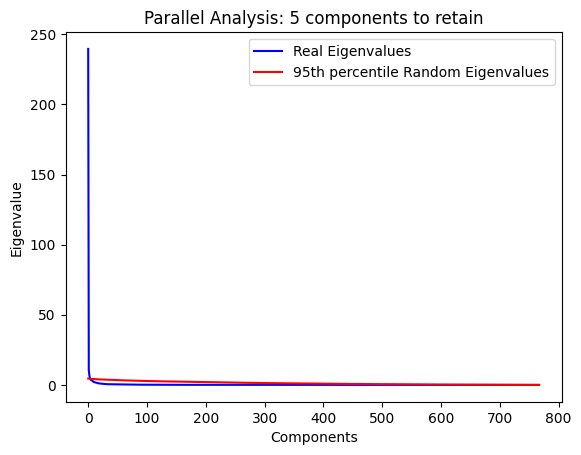

Number of components to retain: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from tqdm import tqdm

def horn_parallel_analysis(data, n_permutations=100, random_state=None):
    random_state = check_random_state(random_state)
    n_vars, n_samples = data.shape
    real_pca = PCA().fit(data)
    real_eigenvalues = real_pca.explained_variance_

    rand_eigenvalues = []

    # Using tqdm for progress bar
    for _ in tqdm(range(n_permutations), desc="Running Parallel Analysis"):
        random_data = random_state.normal(size=data.shape)
        random_pca = PCA().fit(random_data)
        rand_eigenvalues.append(random_pca.explained_variance_)

    eigenvalue_thresholds = np.percentile(rand_eigenvalues, 95, axis=0)

    n_components_to_retain = np.sum(real_eigenvalues > eigenvalue_thresholds)

    # Plotting
    plt.plot(real_eigenvalues, label="Real Eigenvalues", color="blue")
    plt.plot(eigenvalue_thresholds, label="95th percentile Random Eigenvalues", color="red")
    plt.xlabel("Components")
    plt.ylabel("Eigenvalue")
    plt.legend()
    plt.title(f"Parallel Analysis: {n_components_to_retain} components to retain")
    plt.show()

    return n_components_to_retain

# Generate some example data
X = np.array(china_embeddings).T

# Use function
n_components = horn_parallel_analysis(X)
print(f"Number of components to retain: {n_components}")


# Method B

## Intento 1


🌍 Procesando país: Ghana


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 888 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:02<00:00,  1.61it/s]


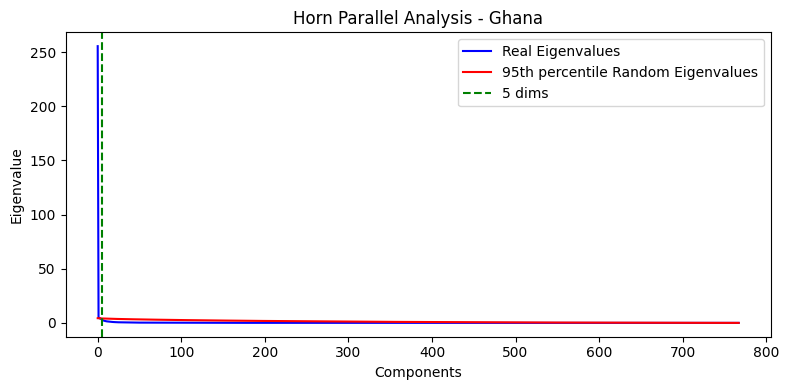

📐 Dimensiones óptimas para Ghana: 5
📏 Subespacio reducido: (5, 888)

🌍 Procesando país: Belize


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 806 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


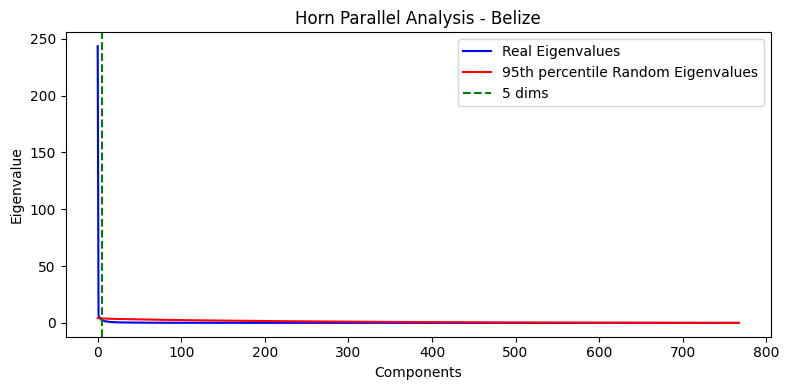

📐 Dimensiones óptimas para Belize: 5
📏 Subespacio reducido: (5, 806)

🌍 Procesando país: Slovenia


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 303 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:10<00:00,  9.88it/s]


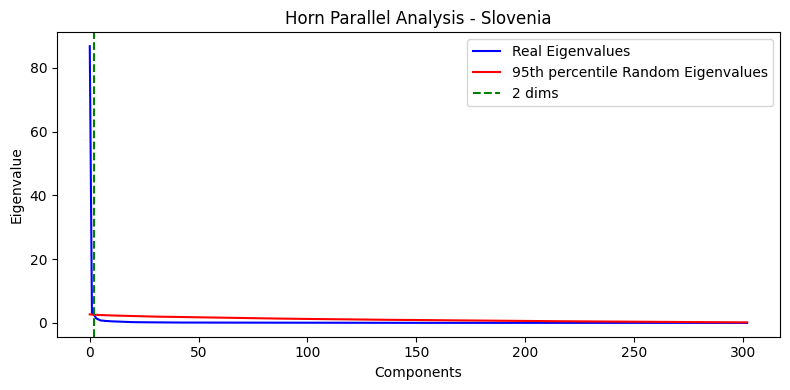

📐 Dimensiones óptimas para Slovenia: 2
📏 Subespacio reducido: (2, 303)

🌍 Procesando país: Slovakia


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 857 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


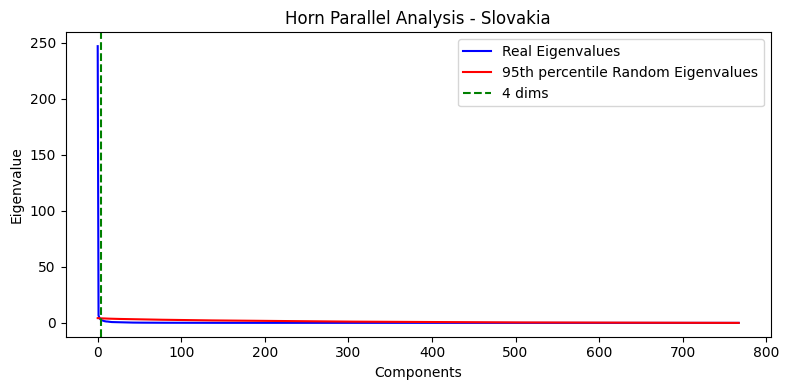

📐 Dimensiones óptimas para Slovakia: 4
📏 Subespacio reducido: (4, 857)

🌍 Procesando país: Zambia


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 903 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


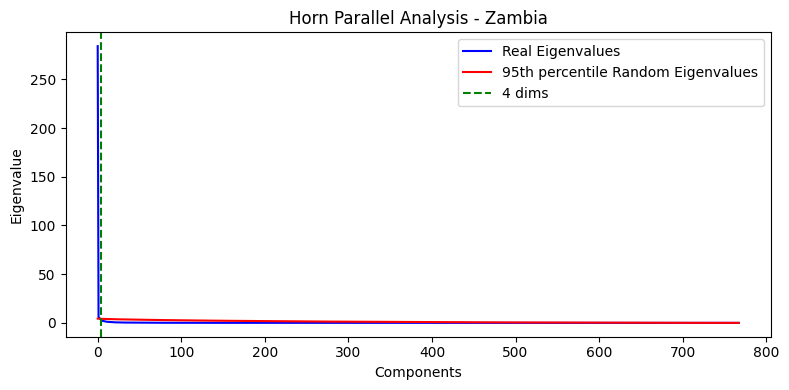

📐 Dimensiones óptimas para Zambia: 4
📏 Subespacio reducido: (4, 903)

🌍 Procesando país: Zimbabwe
✔️ Total embeddings: 1670 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


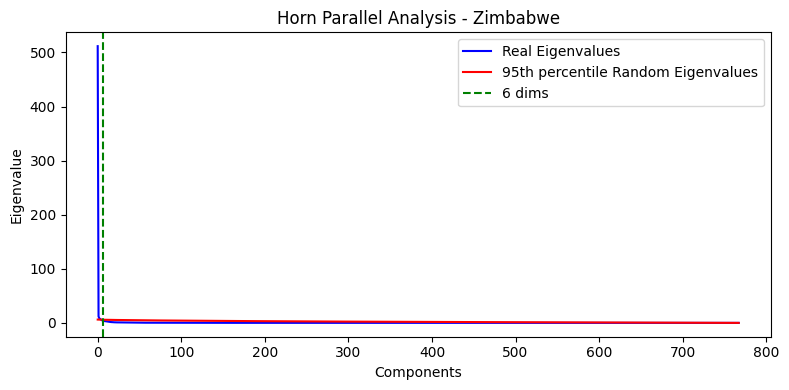

📐 Dimensiones óptimas para Zimbabwe: 6
📏 Subespacio reducido: (6, 1670)

🌍 Procesando país: Laos


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 738 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:48<00:00,  2.04it/s]


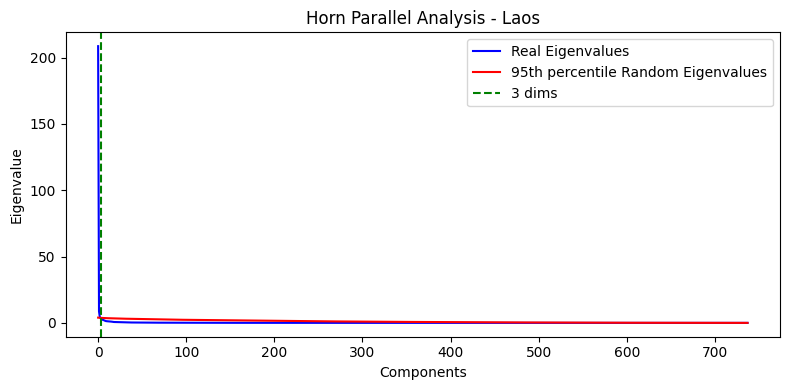

📐 Dimensiones óptimas para Laos: 3
📏 Subespacio reducido: (3, 738)

🌍 Procesando país: Cambodia


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1248 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


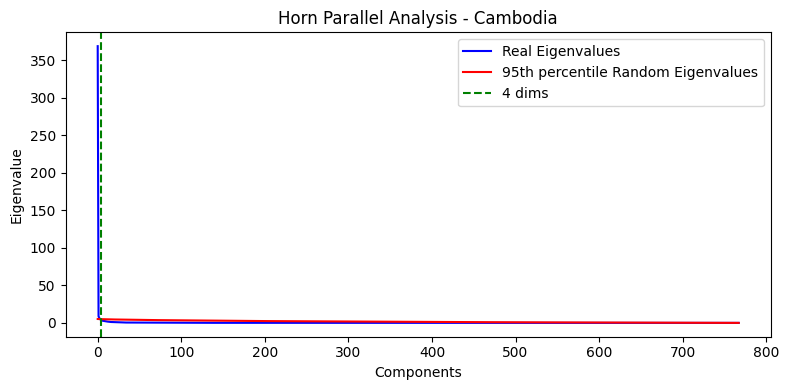

📐 Dimensiones óptimas para Cambodia: 4
📏 Subespacio reducido: (4, 1248)

🌍 Procesando país: Yemen


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 2122 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [02:05<00:00,  1.26s/it]


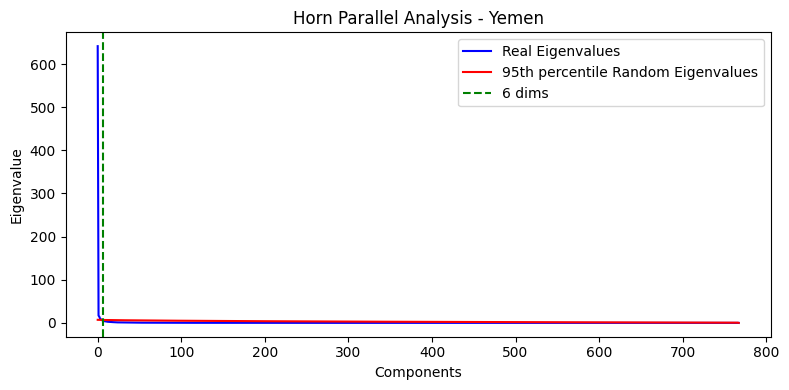

📐 Dimensiones óptimas para Yemen: 6
📏 Subespacio reducido: (6, 2122)

🌍 Procesando país: Turkmenistan
✔️ Total embeddings: 1024 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:09<00:00,  1.43it/s]


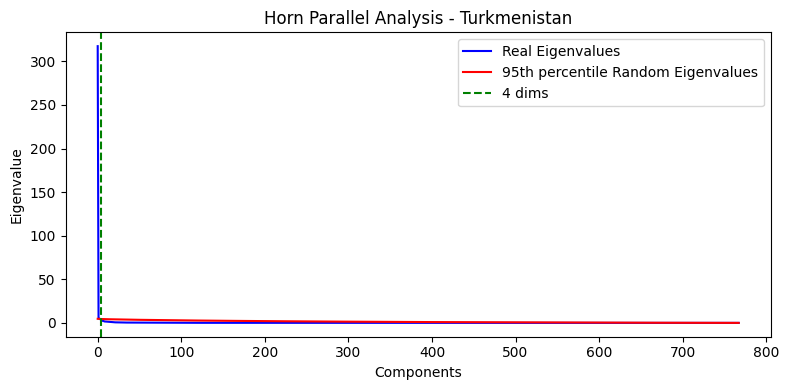

📐 Dimensiones óptimas para Turkmenistan: 4
📏 Subespacio reducido: (4, 1024)

🌍 Procesando país: Uzbekistan


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 717 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


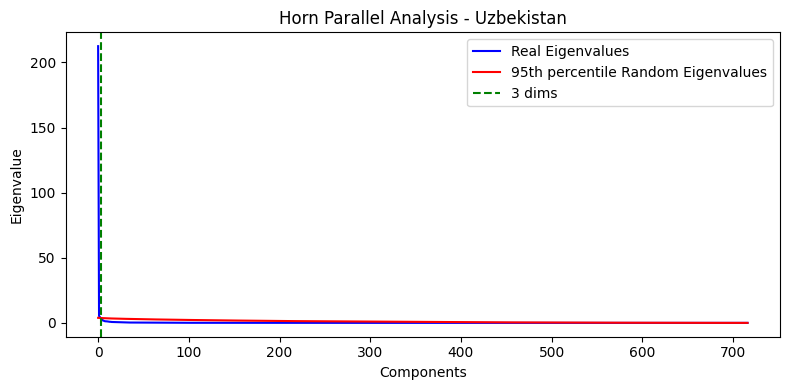

📐 Dimensiones óptimas para Uzbekistan: 3
📏 Subespacio reducido: (3, 717)

🌍 Procesando país: Luxembourg


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1401 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


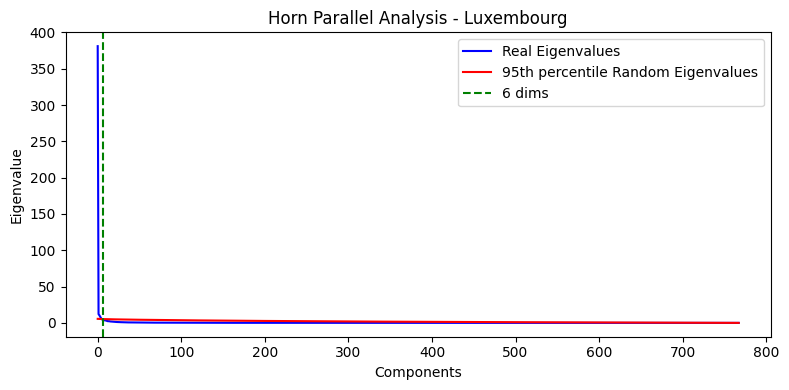

📐 Dimensiones óptimas para Luxembourg: 6
📏 Subespacio reducido: (6, 1401)

🌍 Procesando país: France


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1574 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


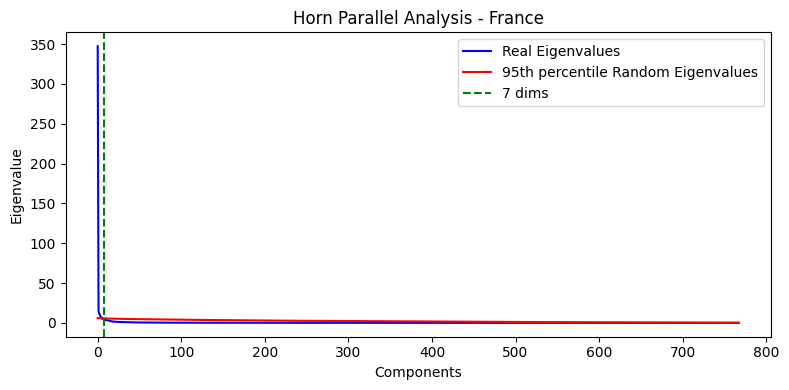

📐 Dimensiones óptimas para France: 7
📏 Subespacio reducido: (7, 1574)

🌍 Procesando país: Bolivia


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 694 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:42<00:00,  2.36it/s]


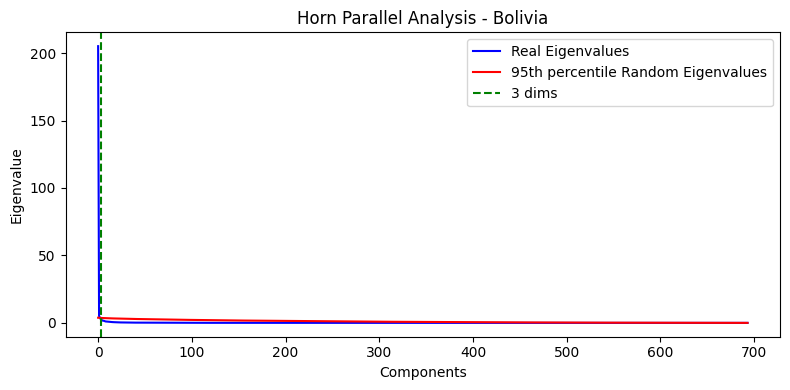

📐 Dimensiones óptimas para Bolivia: 3
📏 Subespacio reducido: (3, 694)

🌍 Procesando país: United States
✔️ Total embeddings: 1241 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


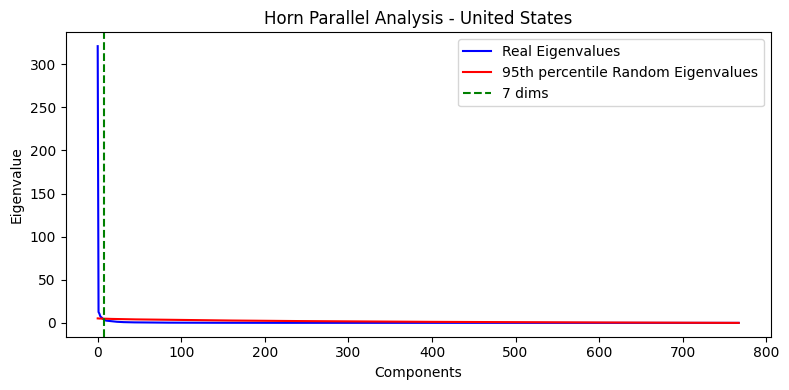

📐 Dimensiones óptimas para United States: 7
📏 Subespacio reducido: (7, 1241)

🌍 Procesando país: China


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 970 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:05<00:00,  1.54it/s]


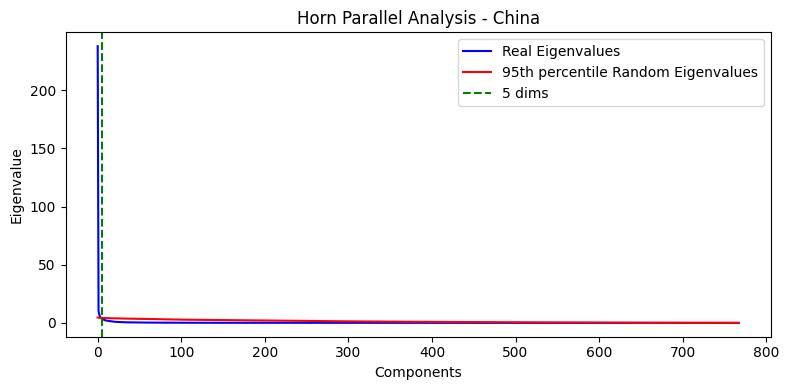

📐 Dimensiones óptimas para China: 5
📏 Subespacio reducido: (5, 970)

🌍 Procesando país: Mexico


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [ ]:
import wikipedia
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from tqdm import tqdm

# Configurar Wikipedia en inglés
wikipedia.set_lang("en")

# Lista de países
countries = [
    "ghana", "belize", "slovenia", "slovakia", "zambia", "zimbabwe", "laos", "cambodia", "yemen",
    "turkmenistan", "uzbekistan", "luxembourg", "france", "bolivia", "united states", "china", "mexico", "russia",
    "belgium", "andorra", "spain", "belarus", "faroe islands", "argentina", "paraguay", "brazil",
    "germany", "canada", "japan", "italy", "morocco", "india", "united kingdom", "singapore", "sweden", "norway",
    "portugal", "ecuador", "peru", "burkina faso", "french guiana", "mongolia", "bulgaria", "oman"
]

# Función para obtener párrafos relevantes desde Wikipedia
def fetch_paragraphs_with_query(query, max_results=30):
    titles = wikipedia.search(query, results=max_results)
    relevant_paragraphs = []
    for title in titles:
        try:
            content = wikipedia.page(title).content
            paragraphs = content.split('\n\n')
            for paragraph in paragraphs:
                if query.lower() in paragraph.lower():
                    relevant_paragraphs.append(paragraph)
        except (wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError):
            continue
    return relevant_paragraphs

# Función para obtener embeddings de BERT de un término en contexto
def get_bert_embeddings(paragraphs, word):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    all_embeddings = []

    for paragraph in paragraphs:
        inputs = tokenizer(paragraph, return_tensors="pt", truncation=True, max_length=512, padding='max_length')
        with torch.no_grad():
            outputs = model(**inputs)

        last_hidden_state = outputs.last_hidden_state
        word_ids = tokenizer.encode(word, add_special_tokens=False)
        word_idx = (inputs["input_ids"] == word_ids[0]).nonzero(as_tuple=False)
        paragraph_embeddings = [last_hidden_state[0][idx[1]].numpy() for idx in word_idx]
        all_embeddings.extend(paragraph_embeddings)

    return all_embeddings

# Análisis Paralelo de Horn
def horn_parallel_analysis(data, n_permutations=100, random_state=None, plot=True, label=""):
    random_state = check_random_state(random_state)
    n_vars, n_samples = data.shape
    real_pca = PCA().fit(data)
    real_eigenvalues = real_pca.explained_variance_

    rand_eigenvalues = []
    for _ in tqdm(range(n_permutations), desc="Running Parallel Analysis"):
        random_data = random_state.normal(size=data.shape)
        random_pca = PCA().fit(random_data)
        rand_eigenvalues.append(random_pca.explained_variance_)

    eigenvalue_thresholds = np.percentile(rand_eigenvalues, 95, axis=0)
    n_components_to_retain = np.sum(real_eigenvalues > eigenvalue_thresholds)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(real_eigenvalues, label="Real Eigenvalues", color="blue")
        plt.plot(eigenvalue_thresholds, label="95th percentile Random Eigenvalues", color="red")
        plt.axvline(n_components_to_retain, color="green", linestyle="--", label=f"{n_components_to_retain} dims")
        plt.xlabel("Components")
        plt.ylabel("Eigenvalue")
        plt.title(f"Horn Parallel Analysis - {label}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return n_components_to_retain

# Loop sobre países
for country in countries:
    print(f"\n🌍 Procesando país: {country.title()}")
    paragraphs = fetch_paragraphs_with_query(country, max_results=30)
    if not paragraphs:
        print(f"❌ No se encontraron párrafos para {country.title()}.")
        continue

    embeddings = get_bert_embeddings(paragraphs, country.lower())
    if len(embeddings) < 10:
        print(f"⚠️ Muy pocos embeddings ({len(embeddings)}). Saltando análisis.")
        continue

    X = np.array(embeddings).T
    print(f"✔️ Total embeddings: {X.shape[1]} (cada uno con {X.shape[0]} dimensiones)")

    # Análisis paralelo
    try:
        n_components = horn_parallel_analysis(X, n_permutations=100, random_state=42, plot=True, label=country.title())
        print(f"📐 Dimensiones óptimas para {country.title()}: {n_components}")

        # PCA final para obtener subespacio reducido
        pca = PCA(n_components=n_components)
        subspace = pca.fit_transform(X).T  # Transpuesta para conservar forma original

        print(f"📏 Subespacio reducido: {subspace.shape}")
    except Exception as e:
        print(f"❌ Error procesando {country.title()}: {e}")


## Intento 2


🌍 Procesando país: China


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1217 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:51<00:00,  1.12s/it]


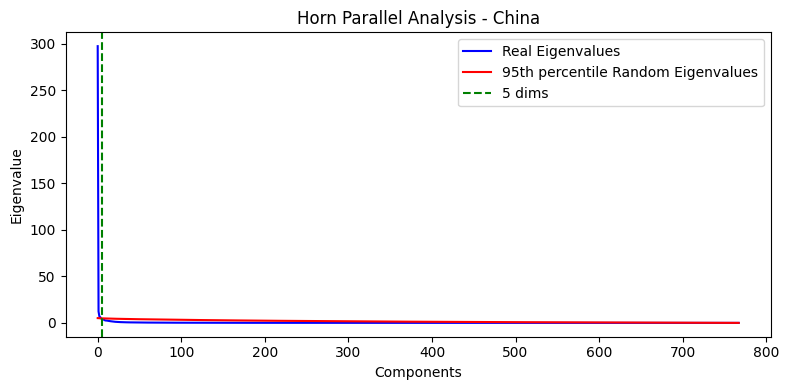

📐 Dimensiones óptimas para China: 5
📏 Subespacio reducido: (5, 1217)

🌍 Procesando país: Mexico


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 2845 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [02:25<00:00,  1.45s/it]


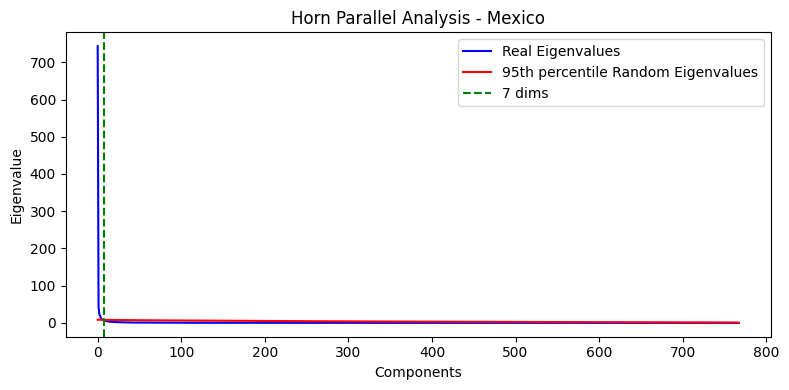

📐 Dimensiones óptimas para Mexico: 7
📏 Subespacio reducido: (7, 2845)

🌍 Procesando país: Russia


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1562 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:39<00:00,  1.00it/s]


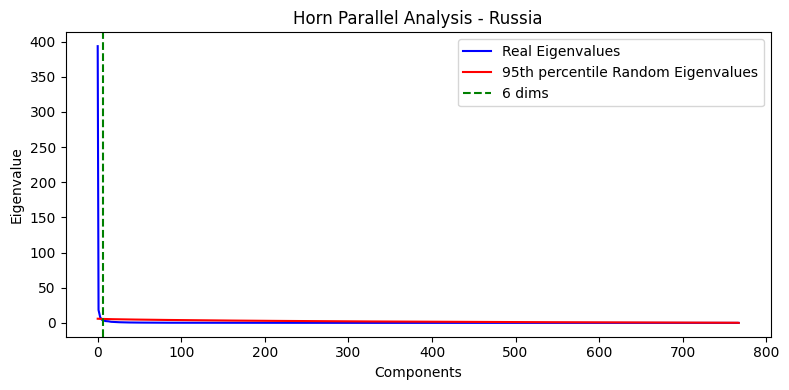

📐 Dimensiones óptimas para Russia: 6
📏 Subespacio reducido: (6, 1562)

🌍 Procesando país: Belgium


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 883 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:00<00:00,  1.66it/s]


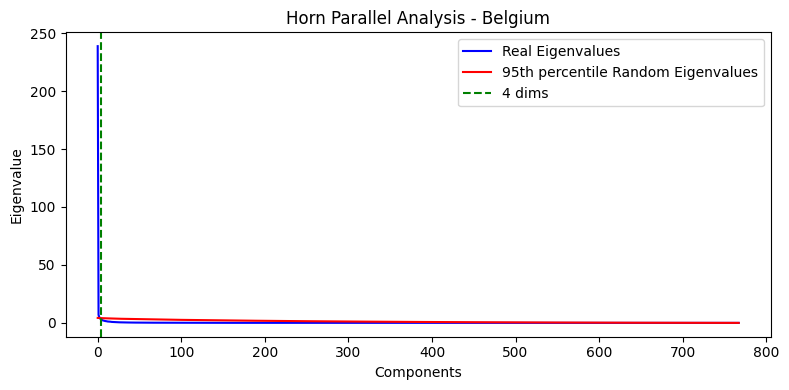

📐 Dimensiones óptimas para Belgium: 4
📏 Subespacio reducido: (4, 883)

🌍 Procesando país: Andorra


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 2128 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [02:05<00:00,  1.25s/it]


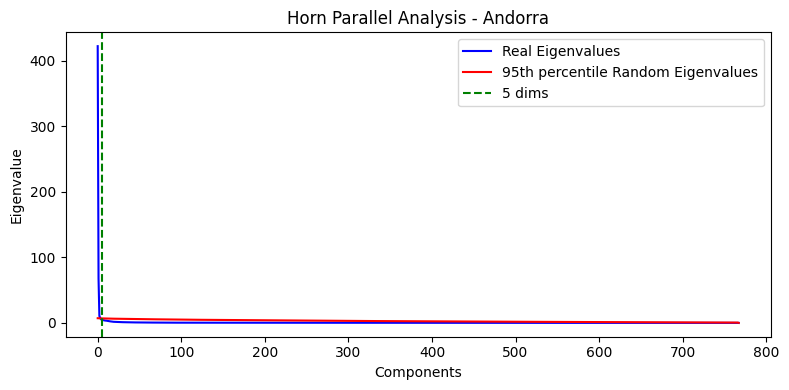

📐 Dimensiones óptimas para Andorra: 5
📏 Subespacio reducido: (5, 2128)

🌍 Procesando país: Spain


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1277 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


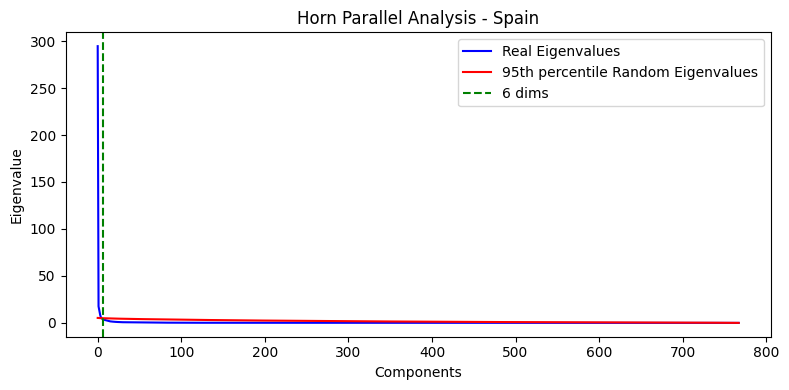

📐 Dimensiones óptimas para Spain: 6
📏 Subespacio reducido: (6, 1277)

🌍 Procesando país: Belarus


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1033 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:10<00:00,  1.43it/s]


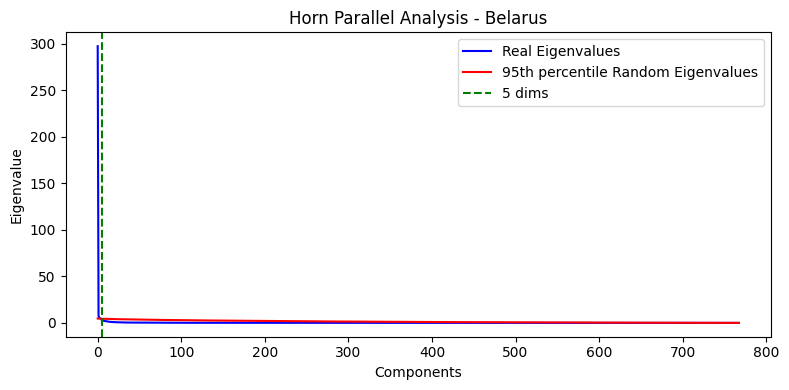

📐 Dimensiones óptimas para Belarus: 5
📏 Subespacio reducido: (5, 1033)

🌍 Procesando país: Faroe Islands
✔️ Total embeddings: 792 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:53<00:00,  1.85it/s]


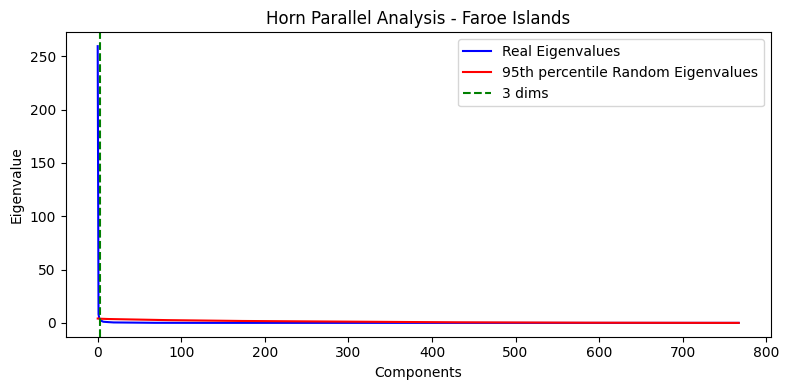

📐 Dimensiones óptimas para Faroe Islands: 3
📏 Subespacio reducido: (3, 792)

🌍 Procesando país: Argentina


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


KeyboardInterrupt: 

In [ ]:
import wikipedia
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from tqdm import tqdm

# Configurar Wikipedia en inglés
wikipedia.set_lang("en")

# Lista de países
countries = [ "china", "mexico", "russia",
    "belgium", "andorra", "spain", "belarus", "faroe islands", "argentina", "paraguay", "brazil",
    "germany", "canada", "japan", "italy", "morocco", "india", "united kingdom", "singapore", "sweden", "norway",
    "portugal", "ecuador", "peru", "burkina faso", "french guiana", "mongolia", "bulgaria", "oman"
]

# Función para obtener párrafos relevantes desde Wikipedia
def fetch_paragraphs_with_query(query, max_results=30):
    titles = wikipedia.search(query, results=max_results)
    relevant_paragraphs = []
    for title in titles:
        try:
            content = wikipedia.page(title).content
            paragraphs = content.split('\n\n')
            for paragraph in paragraphs:
                if query.lower() in paragraph.lower():
                    relevant_paragraphs.append(paragraph)
        except (wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError):
            continue
    return relevant_paragraphs

# Función para obtener embeddings de BERT de un término en contexto
def get_bert_embeddings(paragraphs, word):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    all_embeddings = []

    for paragraph in paragraphs:
        inputs = tokenizer(paragraph, return_tensors="pt", truncation=True, max_length=512, padding='max_length')
        with torch.no_grad():
            outputs = model(**inputs)

        last_hidden_state = outputs.last_hidden_state
        word_ids = tokenizer.encode(word, add_special_tokens=False)
        word_idx = (inputs["input_ids"] == word_ids[0]).nonzero(as_tuple=False)
        paragraph_embeddings = [last_hidden_state[0][idx[1]].numpy() for idx in word_idx]
        all_embeddings.extend(paragraph_embeddings)

    return all_embeddings

# Análisis Paralelo de Horn
def horn_parallel_analysis(data, n_permutations=100, random_state=None, plot=True, label=""):
    random_state = check_random_state(random_state)
    n_vars, n_samples = data.shape
    real_pca = PCA().fit(data)
    real_eigenvalues = real_pca.explained_variance_

    rand_eigenvalues = []
    for _ in tqdm(range(n_permutations), desc="Running Parallel Analysis"):
        random_data = random_state.normal(size=data.shape)
        random_pca = PCA().fit(random_data)
        rand_eigenvalues.append(random_pca.explained_variance_)

    eigenvalue_thresholds = np.percentile(rand_eigenvalues, 95, axis=0)
    n_components_to_retain = np.sum(real_eigenvalues > eigenvalue_thresholds)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(real_eigenvalues, label="Real Eigenvalues", color="blue")
        plt.plot(eigenvalue_thresholds, label="95th percentile Random Eigenvalues", color="red")
        plt.axvline(n_components_to_retain, color="green", linestyle="--", label=f"{n_components_to_retain} dims")
        plt.xlabel("Components")
        plt.ylabel("Eigenvalue")
        plt.title(f"Horn Parallel Analysis - {label}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return n_components_to_retain

# Loop sobre países
for country in countries:
    print(f"\n🌍 Procesando país: {country.title()}")
    paragraphs = fetch_paragraphs_with_query(country, max_results=30)
    if not paragraphs:
        print(f"❌ No se encontraron párrafos para {country.title()}.")
        continue

    embeddings = get_bert_embeddings(paragraphs, country.lower())
    if len(embeddings) < 10:
        print(f"⚠️ Muy pocos embeddings ({len(embeddings)}). Saltando análisis.")
        continue

    X = np.array(embeddings).T
    print(f"✔️ Total embeddings: {X.shape[1]} (cada uno con {X.shape[0]} dimensiones)")

    # Análisis paralelo
    try:
        n_components = horn_parallel_analysis(X, n_permutations=100, random_state=42, plot=True, label=country.title())
        print(f"📐 Dimensiones óptimas para {country.title()}: {n_components}")

        # PCA final para obtener subespacio reducido
        pca = PCA(n_components=n_components)
        subspace = pca.fit_transform(X.T).T  # Transpuesta para conservar forma original

        print(f"📏 Subespacio reducido: {subspace.shape}")
    except Exception as e:
        print(f"❌ Error procesando {country.title()}: {e}")


## Intento 3


🌍 Procesando país: Argentina
✔️ Total embeddings: 922 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:04<00:00,  1.55it/s]


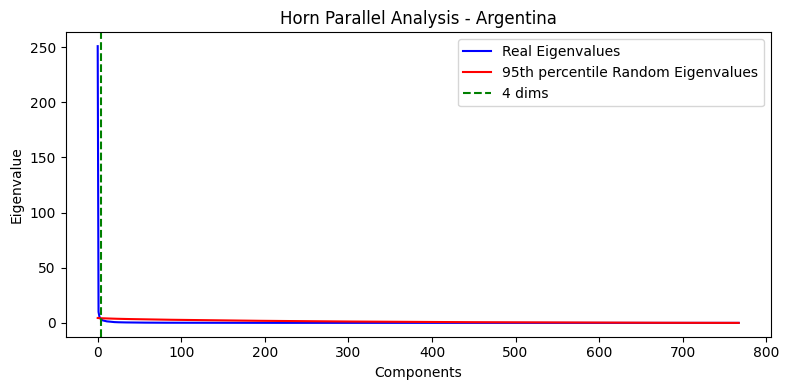

📐 Dimensiones óptimas para Argentina: 4
📏 Subespacio reducido: (4, 922)

🌍 Procesando país: Paraguay


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1545 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


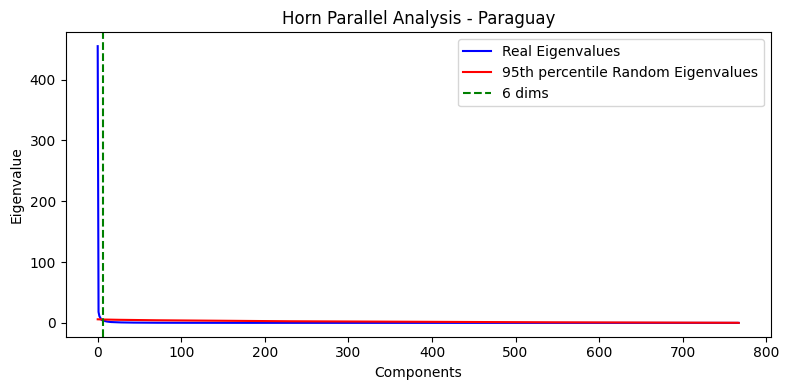

📐 Dimensiones óptimas para Paraguay: 6
📏 Subespacio reducido: (6, 1545)

🌍 Procesando país: Brazil


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1937 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:59<00:00,  1.19s/it]


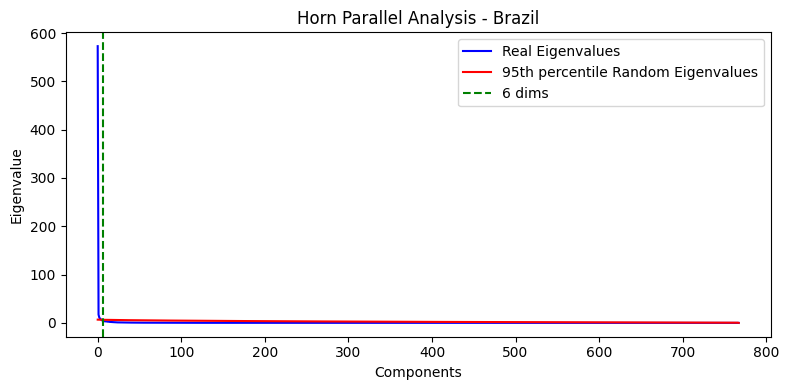

📐 Dimensiones óptimas para Brazil: 6
📏 Subespacio reducido: (6, 1937)

🌍 Procesando país: Germany
✔️ Total embeddings: 2243 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [02:09<00:00,  1.30s/it]


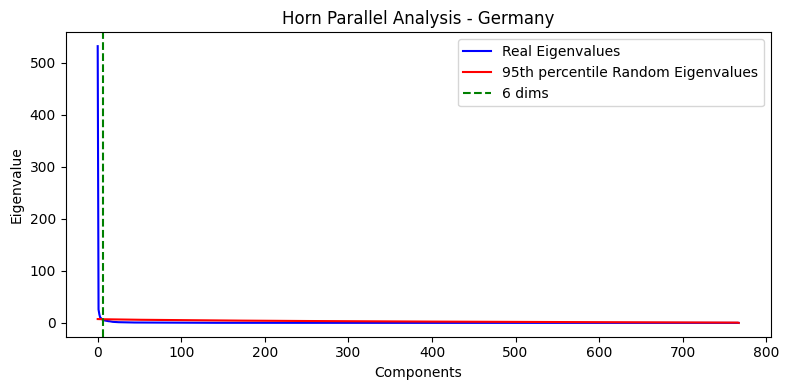

📐 Dimensiones óptimas para Germany: 6
📏 Subespacio reducido: (6, 2243)

🌍 Procesando país: Canada


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1038 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:09<00:00,  1.44it/s]


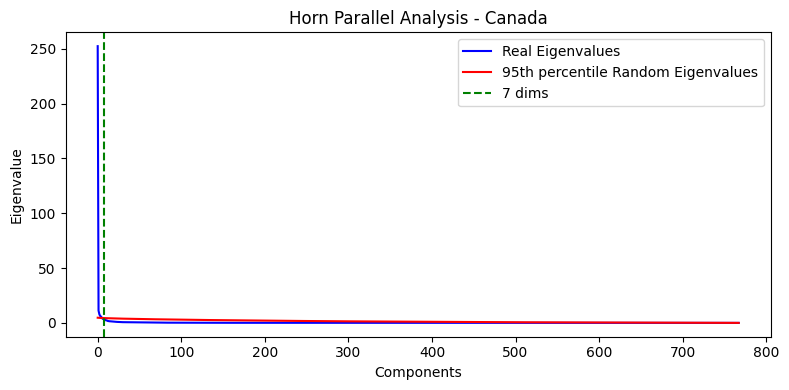

📐 Dimensiones óptimas para Canada: 7
📏 Subespacio reducido: (7, 1038)

🌍 Procesando país: Japan


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1749 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:45<00:00,  1.05s/it]


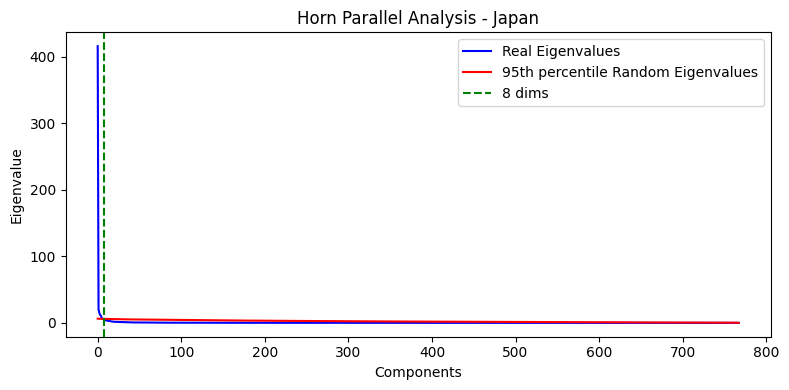

📐 Dimensiones óptimas para Japan: 8
📏 Subespacio reducido: (8, 1749)

🌍 Procesando país: Italy


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1512 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


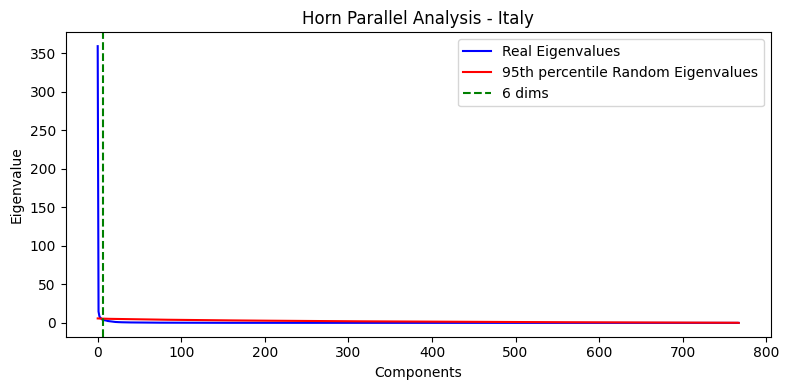

📐 Dimensiones óptimas para Italy: 6
📏 Subespacio reducido: (6, 1512)

🌍 Procesando país: Morocco


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [ ]:
import wikipedia
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from tqdm import tqdm

# Configurar Wikipedia en inglés
wikipedia.set_lang("en")

# Lista de países
countries = [ "argentina", "paraguay", "brazil",
    "germany", "canada", "japan", "italy", "morocco", "india", "united kingdom", "singapore", "sweden", "norway",
    "portugal", "ecuador", "peru", "burkina faso", "french guiana", "mongolia", "bulgaria", "oman"
]

# Función para obtener párrafos relevantes desde Wikipedia
def fetch_paragraphs_with_query(query, max_results=30):
    titles = wikipedia.search(query, results=max_results)
    relevant_paragraphs = []
    for title in titles:
        try:
            content = wikipedia.page(title).content
            paragraphs = content.split('\n\n')
            for paragraph in paragraphs:
                if query.lower() in paragraph.lower():
                    relevant_paragraphs.append(paragraph)
        except (wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError):
            continue
    return relevant_paragraphs

# Función para obtener embeddings de BERT de un término en contexto
def get_bert_embeddings(paragraphs, word):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    all_embeddings = []

    for paragraph in paragraphs:
        inputs = tokenizer(paragraph, return_tensors="pt", truncation=True, max_length=512, padding='max_length')
        with torch.no_grad():
            outputs = model(**inputs)

        last_hidden_state = outputs.last_hidden_state
        word_ids = tokenizer.encode(word, add_special_tokens=False)
        word_idx = (inputs["input_ids"] == word_ids[0]).nonzero(as_tuple=False)
        paragraph_embeddings = [last_hidden_state[0][idx[1]].numpy() for idx in word_idx]
        all_embeddings.extend(paragraph_embeddings)

    return all_embeddings

# Análisis Paralelo de Horn
def horn_parallel_analysis(data, n_permutations=100, random_state=None, plot=True, label=""):
    random_state = check_random_state(random_state)
    n_vars, n_samples = data.shape
    real_pca = PCA().fit(data)
    real_eigenvalues = real_pca.explained_variance_

    rand_eigenvalues = []
    for _ in tqdm(range(n_permutations), desc="Running Parallel Analysis"):
        random_data = random_state.normal(size=data.shape)
        random_pca = PCA().fit(random_data)
        rand_eigenvalues.append(random_pca.explained_variance_)

    eigenvalue_thresholds = np.percentile(rand_eigenvalues, 95, axis=0)
    n_components_to_retain = np.sum(real_eigenvalues > eigenvalue_thresholds)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(real_eigenvalues, label="Real Eigenvalues", color="blue")
        plt.plot(eigenvalue_thresholds, label="95th percentile Random Eigenvalues", color="red")
        plt.axvline(n_components_to_retain, color="green", linestyle="--", label=f"{n_components_to_retain} dims")
        plt.xlabel("Components")
        plt.ylabel("Eigenvalue")
        plt.title(f"Horn Parallel Analysis - {label}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return n_components_to_retain

# Loop sobre países
for country in countries:
    print(f"\n🌍 Procesando país: {country.title()}")
    paragraphs = fetch_paragraphs_with_query(country, max_results=30)
    if not paragraphs:
        print(f"❌ No se encontraron párrafos para {country.title()}.")
        continue

    embeddings = get_bert_embeddings(paragraphs, country.lower())
    if len(embeddings) < 10:
        print(f"⚠️ Muy pocos embeddings ({len(embeddings)}). Saltando análisis.")
        continue

    X = np.array(embeddings).T
    print(f"✔️ Total embeddings: {X.shape[1]} (cada uno con {X.shape[0]} dimensiones)")

    # Análisis paralelo
    try:
        n_components = horn_parallel_analysis(X, n_permutations=100, random_state=42, plot=True, label=country.title())
        print(f"📐 Dimensiones óptimas para {country.title()}: {n_components}")

        # PCA final para obtener subespacio reducido
        pca = PCA(n_components=n_components)
        subspace = pca.fit_transform(X.T).T  # Transpuesta para conservar forma original

        print(f"📏 Subespacio reducido: {subspace.shape}")
    except Exception as e:
        print(f"❌ Error procesando {country.title()}: {e}")


## Intento 4


🌍 Procesando país: Morocco


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1236 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


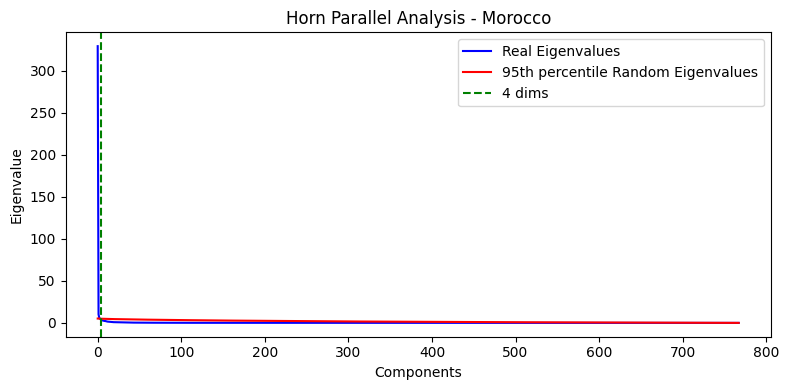

📐 Dimensiones óptimas para Morocco: 4
📏 Subespacio reducido: (4, 1236)

🌍 Procesando país: India


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 2381 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [02:09<00:00,  1.29s/it]


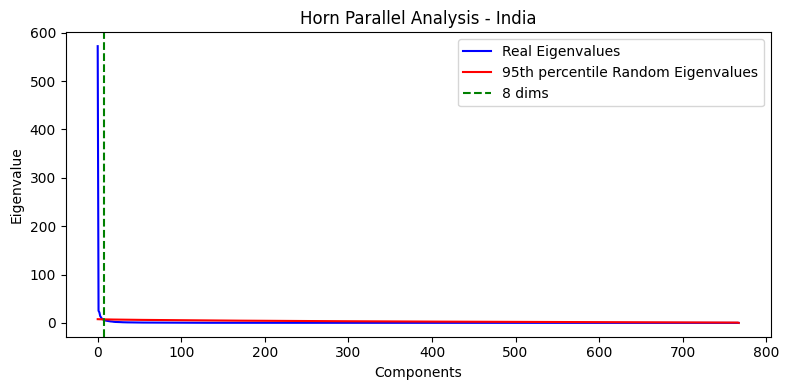

📐 Dimensiones óptimas para India: 8
📏 Subespacio reducido: (8, 2381)

🌍 Procesando país: United Kingdom
✔️ Total embeddings: 687 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:42<00:00,  2.34it/s]


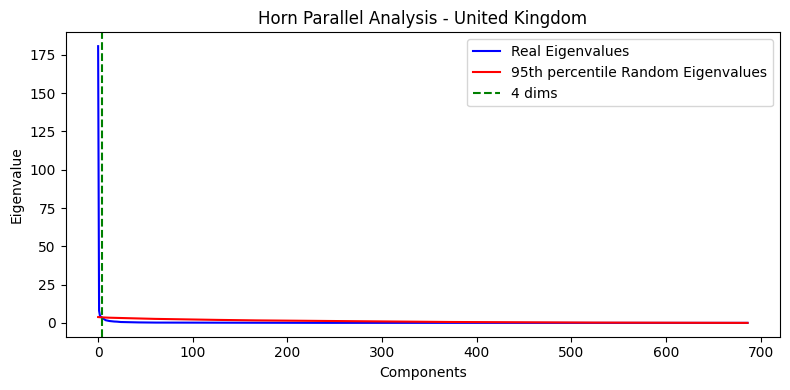

📐 Dimensiones óptimas para United Kingdom: 4
📏 Subespacio reducido: (4, 687)

🌍 Procesando país: Singapore


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 2032 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [02:00<00:00,  1.21s/it]


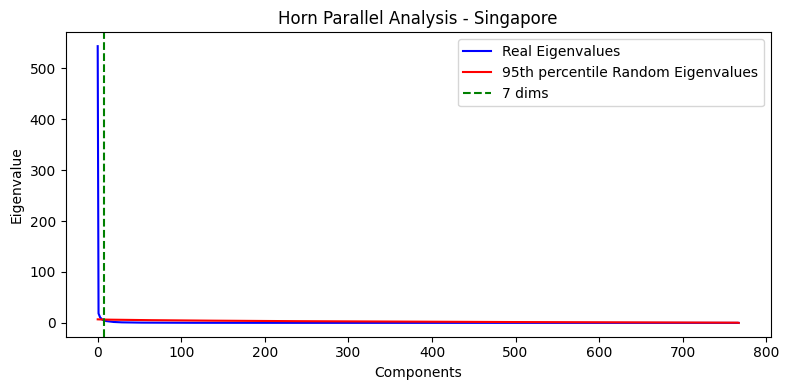

📐 Dimensiones óptimas para Singapore: 7
📏 Subespacio reducido: (7, 2032)

🌍 Procesando país: Sweden


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1959 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [02:06<00:00,  1.26s/it]


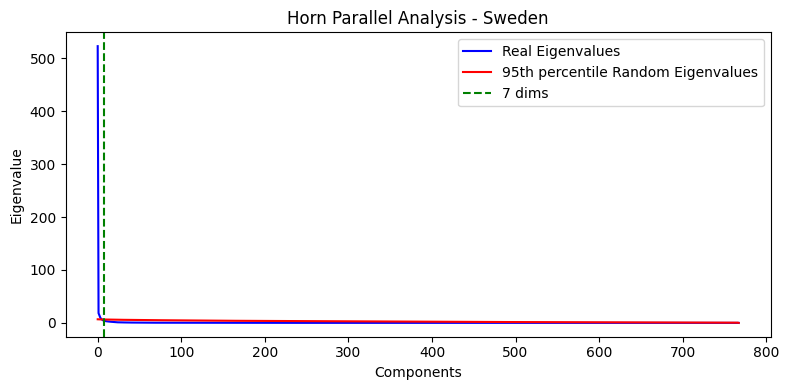

📐 Dimensiones óptimas para Sweden: 7
📏 Subespacio reducido: (7, 1959)

🌍 Procesando país: Norway


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1046 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


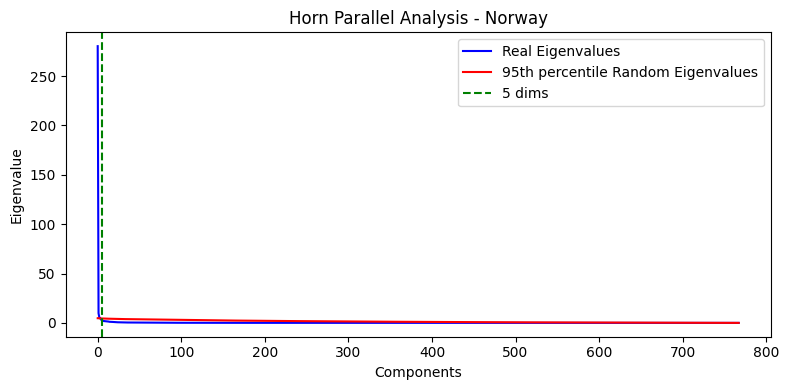

📐 Dimensiones óptimas para Norway: 5
📏 Subespacio reducido: (5, 1046)

🌍 Procesando país: Portugal


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1151 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:20<00:00,  1.24it/s]


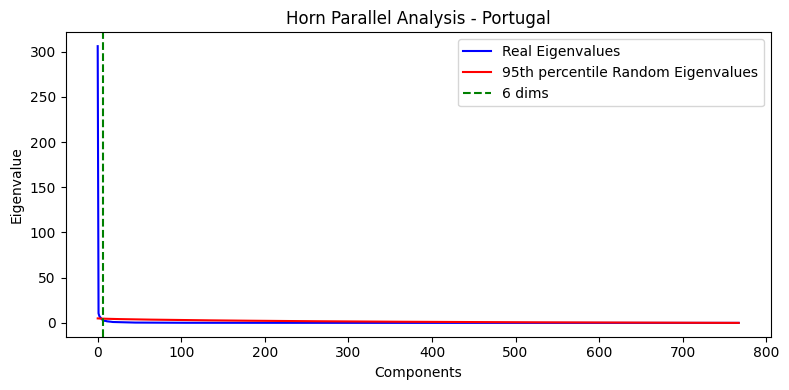

📐 Dimensiones óptimas para Portugal: 6
📏 Subespacio reducido: (6, 1151)

🌍 Procesando país: Ecuador


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 798 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:55<00:00,  1.81it/s]


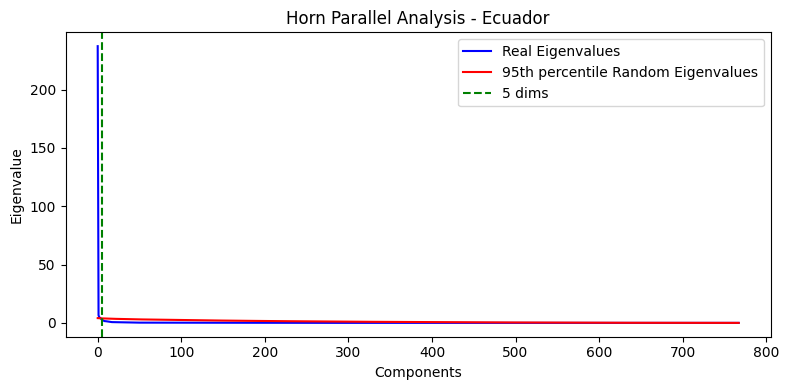

📐 Dimensiones óptimas para Ecuador: 5
📏 Subespacio reducido: (5, 798)

🌍 Procesando país: Peru


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 912 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:04<00:00,  1.56it/s]


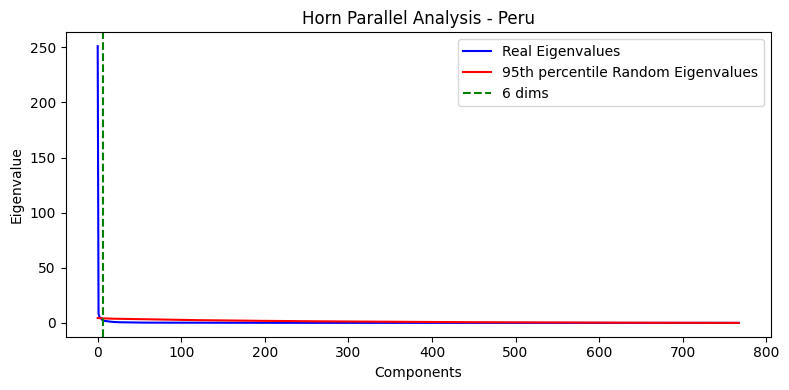

📐 Dimensiones óptimas para Peru: 6
📏 Subespacio reducido: (6, 912)

🌍 Procesando país: Burkina Faso
✔️ Total embeddings: 671 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:42<00:00,  2.33it/s]


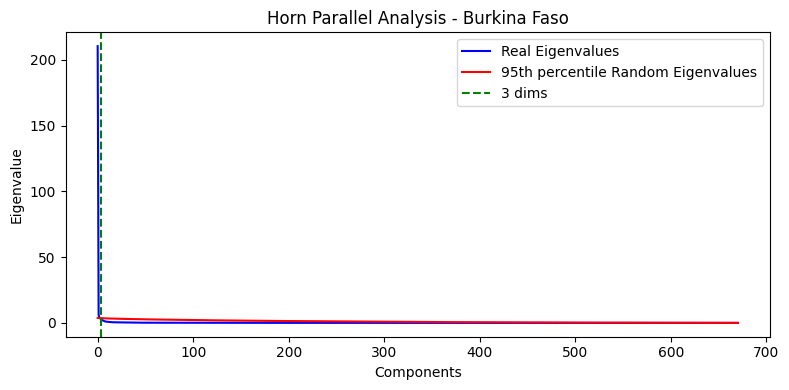

📐 Dimensiones óptimas para Burkina Faso: 3
📏 Subespacio reducido: (3, 671)

🌍 Procesando país: French Guiana


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 353 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:12<00:00,  7.92it/s]


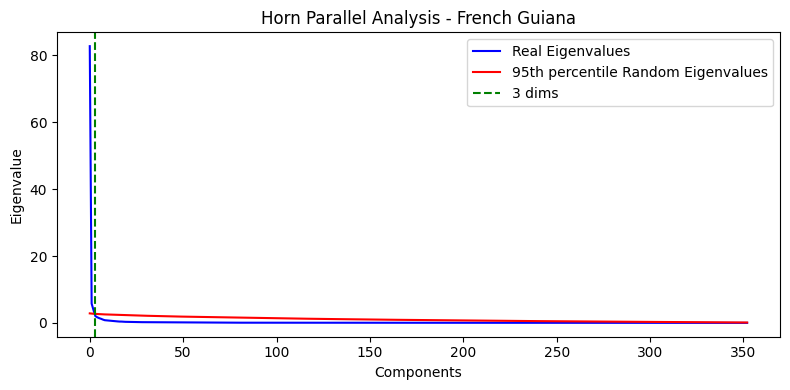

📐 Dimensiones óptimas para French Guiana: 3
📏 Subespacio reducido: (3, 353)

🌍 Procesando país: Mongolia


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1194 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


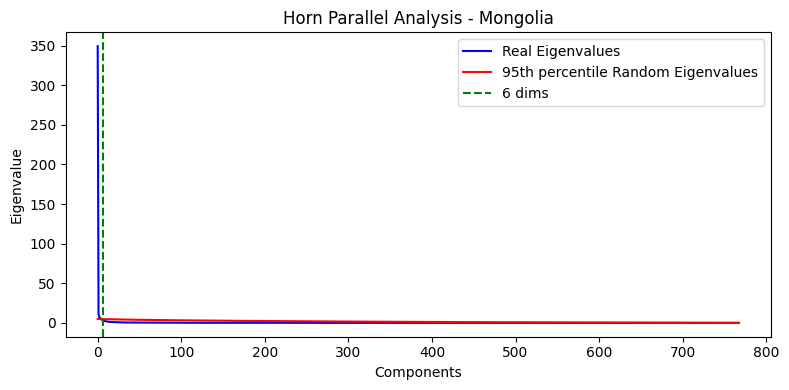

📐 Dimensiones óptimas para Mongolia: 6
📏 Subespacio reducido: (6, 1194)

🌍 Procesando país: Bulgaria


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 1203 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]


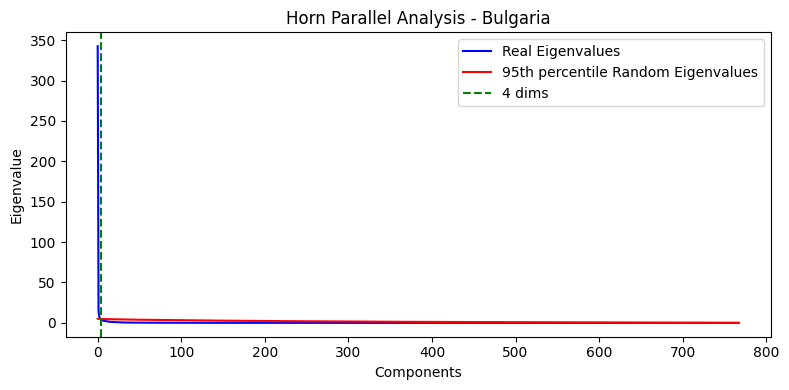

📐 Dimensiones óptimas para Bulgaria: 4
📏 Subespacio reducido: (4, 1203)

🌍 Procesando país: Oman


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


✔️ Total embeddings: 578 (cada uno con 768 dimensiones)


Running Parallel Analysis: 100%|██████████| 100/100 [00:32<00:00,  3.06it/s]


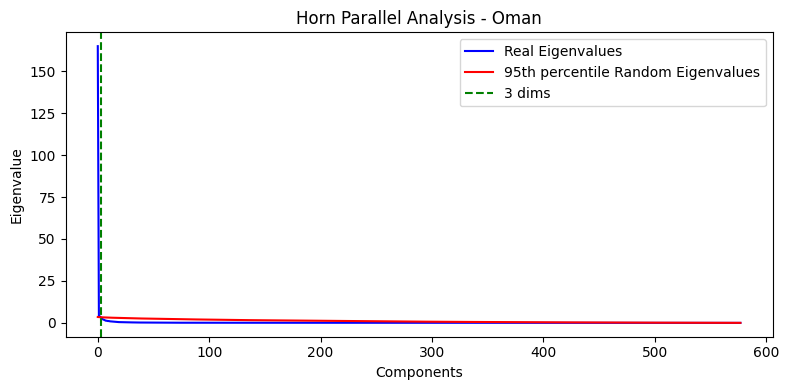

📐 Dimensiones óptimas para Oman: 3
📏 Subespacio reducido: (3, 578)


In [ ]:
import wikipedia
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from tqdm import tqdm

# Configurar Wikipedia en inglés
wikipedia.set_lang("en")

# Lista de países
countries = [  "morocco", "india", "united kingdom", "singapore", "sweden", "norway",
    "portugal", "ecuador", "peru", "burkina faso", "french guiana", "mongolia", "bulgaria", "oman"
]

# Función para obtener párrafos relevantes desde Wikipedia
def fetch_paragraphs_with_query(query, max_results=30):
    titles = wikipedia.search(query, results=max_results)
    relevant_paragraphs = []
    for title in titles:
        try:
            content = wikipedia.page(title).content
            paragraphs = content.split('\n\n')
            for paragraph in paragraphs:
                if query.lower() in paragraph.lower():
                    relevant_paragraphs.append(paragraph)
        except (wikipedia.exceptions.DisambiguationError, wikipedia.exceptions.PageError):
            continue
    return relevant_paragraphs

# Función para obtener embeddings de BERT de un término en contexto
def get_bert_embeddings(paragraphs, word):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    all_embeddings = []

    for paragraph in paragraphs:
        inputs = tokenizer(paragraph, return_tensors="pt", truncation=True, max_length=512, padding='max_length')
        with torch.no_grad():
            outputs = model(**inputs)

        last_hidden_state = outputs.last_hidden_state
        word_ids = tokenizer.encode(word, add_special_tokens=False)
        word_idx = (inputs["input_ids"] == word_ids[0]).nonzero(as_tuple=False)
        paragraph_embeddings = [last_hidden_state[0][idx[1]].numpy() for idx in word_idx]
        all_embeddings.extend(paragraph_embeddings)

    return all_embeddings

# Análisis Paralelo de Horn
def horn_parallel_analysis(data, n_permutations=100, random_state=None, plot=True, label=""):
    random_state = check_random_state(random_state)
    n_vars, n_samples = data.shape
    real_pca = PCA().fit(data)
    real_eigenvalues = real_pca.explained_variance_

    rand_eigenvalues = []
    for _ in tqdm(range(n_permutations), desc="Running Parallel Analysis"):
        random_data = random_state.normal(size=data.shape)
        random_pca = PCA().fit(random_data)
        rand_eigenvalues.append(random_pca.explained_variance_)

    eigenvalue_thresholds = np.percentile(rand_eigenvalues, 95, axis=0)
    n_components_to_retain = np.sum(real_eigenvalues > eigenvalue_thresholds)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(real_eigenvalues, label="Real Eigenvalues", color="blue")
        plt.plot(eigenvalue_thresholds, label="95th percentile Random Eigenvalues", color="red")
        plt.axvline(n_components_to_retain, color="green", linestyle="--", label=f"{n_components_to_retain} dims")
        plt.xlabel("Components")
        plt.ylabel("Eigenvalue")
        plt.title(f"Horn Parallel Analysis - {label}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return n_components_to_retain

# Loop sobre países
for country in countries:
    print(f"\n🌍 Procesando país: {country.title()}")
    paragraphs = fetch_paragraphs_with_query(country, max_results=30)
    if not paragraphs:
        print(f"❌ No se encontraron párrafos para {country.title()}.")
        continue

    embeddings = get_bert_embeddings(paragraphs, country.lower())
    if len(embeddings) < 10:
        print(f"⚠️ Muy pocos embeddings ({len(embeddings)}). Saltando análisis.")
        continue

    X = np.array(embeddings).T
    print(f"✔️ Total embeddings: {X.shape[1]} (cada uno con {X.shape[0]} dimensiones)")

    # Análisis paralelo
    try:
        n_components = horn_parallel_analysis(X, n_permutations=100, random_state=42, plot=True, label=country.title())
        print(f"📐 Dimensiones óptimas para {country.title()}: {n_components}")

        # PCA final para obtener subespacio reducido
        pca = PCA(n_components=n_components)
        subspace = pca.fit_transform(X.T).T  # Transpuesta para conservar forma original

        print(f"📏 Subespacio reducido: {subspace.shape}")
    except Exception as e:
        print(f"❌ Error procesando {country.title()}: {e}")
